In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import sklearn.datasets
import matplotlib
import tensorflow as tf
import pydot
from IPython.display import Image
from IPython.display import SVG
import timeit
from sklearn.cross_validation import train_test_split

# Display plots inline and change default figure size
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

/Users/adityavyas/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


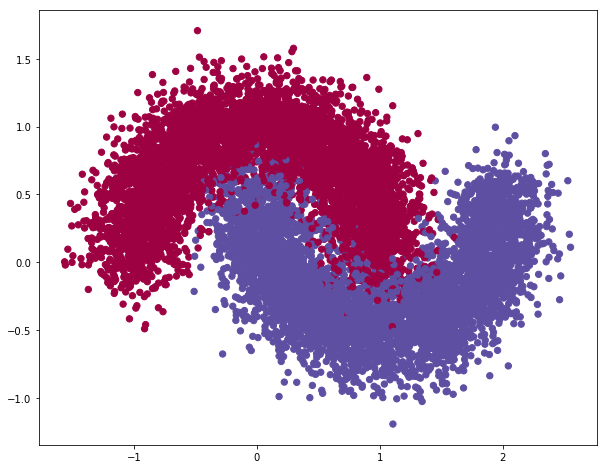

In [97]:
np.random.seed(0)
train_X, train_y = sklearn.datasets.make_moons(10000, noise=0.20)

x_train, x_val, y_train, y_val = train_test_split(train_X, train_y, train_size=0.9)
plt.scatter(train_X[:,0], train_X[:,1], s=40, c=train_y, cmap=plt.cm.Spectral)

In [98]:
y_train_new = []
y_val_new = []
for num, i in enumerate(y_train):
    if i==0:
        y_train_new.append([1,0])
    else:
        y_train_new.append([0,1])
        
for num, i in enumerate(y_val):
    if i==0:
        y_val_new.append([1,0])
    else:
        y_val_new.append([0,1])

## Initialize neural network architecture

In [103]:
num_examples = len(X)
nn_input_dim = train_X.shape[1]
nn_output_dim = 2
nn_hdim = 100

epsilon = 0.01 # learning rate for gradient descent
reg_lambda = 0.01

# Define variables
def initialize_variables():
    x = tf.placeholder(tf.float32, shape=[None, nn_input_dim])
    y = tf.placeholder(tf.float32, shape=[None, nn_output_dim])

    return x, y

#Define weights and biases
def initialize_weights_biases():
    np.random.seed(0)
    W1 = tf.Variable(tf.random_normal(shape=[nn_input_dim, nn_hdim]))
    b1 = tf.Variable(tf.zeros(shape=[1, nn_hdim]))
    W2 = tf.Variable(tf.random_normal(shape=[nn_hdim, nn_output_dim]))
    b2 = tf.Variable(tf.zeros(shape=[1, nn_output_dim]))
    
    return W1, b1, W2, b2

In [104]:
def neural_network_model(train_X, train_y, num_rounds=10000):
    
    X, y = initialize_variables()
    W1, b1, W2, b2 = initialize_weights_biases()
    
    #Forward Propogation
    z1 = tf.matmul(X, W1) + b1
    a1 = tf.nn.sigmoid(z1)
    yhat = tf.matmul(a1, W2) + b2
    predict = tf.argmax(yhat, axis=1)
    
    #Back-Propogation
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=yhat))
    updates = tf.train.GradientDescentOptimizer(0.01).minimize(cost)
    
    #Intialize Session
    sess = tf.Session()
    init = tf.global_variables_initializer()
    sess.run(init)
    
    for epoch in range(num_rounds):
        sess.run(updates, feed_dict={X:x_train, y:y_train_new})

        train_accuracy = np.mean(np.argmax(y_train_new, axis=1) ==
                             sess.run(predict, feed_dict={X: x_train, y: y_train_new}))
        
        
        test_accuracy = np.mean(np.argmax(y_val_new, axis=1) ==
                             sess.run(predict, feed_dict={X: x_val, y: y_val_new}))
        
        
        print("Epoch = %d, train accuracy = %.2f%%, test accuracy = %.2f%%"
                  % (epoch + 1, 100. * train_accuracy, 100. * test_accuracy))
    
    sess.close()
    

In [105]:
neural_network_model(train_X, train_Y)

Epoch = 1, train accuracy = 50.01%, test accuracy = 49.90%
Epoch = 2, train accuracy = 50.01%, test accuracy = 49.90%
Epoch = 3, train accuracy = 50.01%, test accuracy = 49.90%
Epoch = 4, train accuracy = 50.01%, test accuracy = 49.90%
Epoch = 5, train accuracy = 50.01%, test accuracy = 49.90%
Epoch = 6, train accuracy = 50.01%, test accuracy = 49.90%
Epoch = 7, train accuracy = 50.01%, test accuracy = 49.90%
Epoch = 8, train accuracy = 50.01%, test accuracy = 49.90%
Epoch = 9, train accuracy = 50.01%, test accuracy = 49.90%
Epoch = 10, train accuracy = 50.01%, test accuracy = 49.90%
Epoch = 11, train accuracy = 50.01%, test accuracy = 49.90%
Epoch = 12, train accuracy = 50.01%, test accuracy = 49.90%
Epoch = 13, train accuracy = 50.01%, test accuracy = 49.90%
Epoch = 14, train accuracy = 50.01%, test accuracy = 49.90%
Epoch = 15, train accuracy = 50.01%, test accuracy = 49.90%
Epoch = 16, train accuracy = 50.01%, test accuracy = 49.90%
Epoch = 17, train accuracy = 50.01%, test accurac

Epoch = 140, train accuracy = 85.02%, test accuracy = 85.70%
Epoch = 141, train accuracy = 85.03%, test accuracy = 85.70%
Epoch = 142, train accuracy = 85.01%, test accuracy = 85.70%
Epoch = 143, train accuracy = 85.02%, test accuracy = 85.40%
Epoch = 144, train accuracy = 85.02%, test accuracy = 85.40%
Epoch = 145, train accuracy = 85.06%, test accuracy = 85.60%
Epoch = 146, train accuracy = 85.08%, test accuracy = 85.50%
Epoch = 147, train accuracy = 85.09%, test accuracy = 85.50%
Epoch = 148, train accuracy = 85.12%, test accuracy = 85.50%
Epoch = 149, train accuracy = 85.11%, test accuracy = 85.60%
Epoch = 150, train accuracy = 85.13%, test accuracy = 85.60%
Epoch = 151, train accuracy = 85.17%, test accuracy = 85.80%
Epoch = 152, train accuracy = 85.22%, test accuracy = 85.90%
Epoch = 153, train accuracy = 85.20%, test accuracy = 86.10%
Epoch = 154, train accuracy = 85.20%, test accuracy = 86.00%
Epoch = 155, train accuracy = 85.22%, test accuracy = 85.90%
Epoch = 156, train accur

Epoch = 275, train accuracy = 85.59%, test accuracy = 86.40%
Epoch = 276, train accuracy = 85.59%, test accuracy = 86.40%
Epoch = 277, train accuracy = 85.59%, test accuracy = 86.50%
Epoch = 278, train accuracy = 85.59%, test accuracy = 86.50%
Epoch = 279, train accuracy = 85.59%, test accuracy = 86.50%
Epoch = 280, train accuracy = 85.59%, test accuracy = 86.50%
Epoch = 281, train accuracy = 85.59%, test accuracy = 86.50%
Epoch = 282, train accuracy = 85.60%, test accuracy = 86.50%
Epoch = 283, train accuracy = 85.60%, test accuracy = 86.50%
Epoch = 284, train accuracy = 85.61%, test accuracy = 86.50%
Epoch = 285, train accuracy = 85.61%, test accuracy = 86.50%
Epoch = 286, train accuracy = 85.61%, test accuracy = 86.50%
Epoch = 287, train accuracy = 85.61%, test accuracy = 86.50%
Epoch = 288, train accuracy = 85.61%, test accuracy = 86.50%
Epoch = 289, train accuracy = 85.61%, test accuracy = 86.50%
Epoch = 290, train accuracy = 85.61%, test accuracy = 86.50%
Epoch = 291, train accur

Epoch = 413, train accuracy = 85.88%, test accuracy = 86.50%
Epoch = 414, train accuracy = 85.90%, test accuracy = 86.50%
Epoch = 415, train accuracy = 85.90%, test accuracy = 86.50%
Epoch = 416, train accuracy = 85.90%, test accuracy = 86.50%
Epoch = 417, train accuracy = 85.90%, test accuracy = 86.50%
Epoch = 418, train accuracy = 85.91%, test accuracy = 86.50%
Epoch = 419, train accuracy = 85.91%, test accuracy = 86.50%
Epoch = 420, train accuracy = 85.91%, test accuracy = 86.50%
Epoch = 421, train accuracy = 85.91%, test accuracy = 86.50%
Epoch = 422, train accuracy = 85.92%, test accuracy = 86.50%
Epoch = 423, train accuracy = 85.92%, test accuracy = 86.50%
Epoch = 424, train accuracy = 85.93%, test accuracy = 86.50%
Epoch = 425, train accuracy = 85.93%, test accuracy = 86.50%
Epoch = 426, train accuracy = 85.94%, test accuracy = 86.50%
Epoch = 427, train accuracy = 85.96%, test accuracy = 86.50%
Epoch = 428, train accuracy = 85.96%, test accuracy = 86.50%
Epoch = 429, train accur

Epoch = 551, train accuracy = 86.11%, test accuracy = 86.80%
Epoch = 552, train accuracy = 86.11%, test accuracy = 86.80%
Epoch = 553, train accuracy = 86.13%, test accuracy = 86.80%
Epoch = 554, train accuracy = 86.13%, test accuracy = 86.80%
Epoch = 555, train accuracy = 86.13%, test accuracy = 86.80%
Epoch = 556, train accuracy = 86.13%, test accuracy = 86.80%
Epoch = 557, train accuracy = 86.13%, test accuracy = 86.80%
Epoch = 558, train accuracy = 86.13%, test accuracy = 86.80%
Epoch = 559, train accuracy = 86.13%, test accuracy = 86.80%
Epoch = 560, train accuracy = 86.13%, test accuracy = 86.80%
Epoch = 561, train accuracy = 86.13%, test accuracy = 86.80%
Epoch = 562, train accuracy = 86.13%, test accuracy = 86.80%
Epoch = 563, train accuracy = 86.13%, test accuracy = 86.80%
Epoch = 564, train accuracy = 86.13%, test accuracy = 86.80%
Epoch = 565, train accuracy = 86.13%, test accuracy = 86.80%
Epoch = 566, train accuracy = 86.13%, test accuracy = 86.80%
Epoch = 567, train accur

Epoch = 690, train accuracy = 86.21%, test accuracy = 86.80%
Epoch = 691, train accuracy = 86.21%, test accuracy = 86.80%
Epoch = 692, train accuracy = 86.21%, test accuracy = 86.80%
Epoch = 693, train accuracy = 86.21%, test accuracy = 86.80%
Epoch = 694, train accuracy = 86.21%, test accuracy = 86.80%
Epoch = 695, train accuracy = 86.21%, test accuracy = 86.80%
Epoch = 696, train accuracy = 86.21%, test accuracy = 86.80%
Epoch = 697, train accuracy = 86.21%, test accuracy = 86.80%
Epoch = 698, train accuracy = 86.21%, test accuracy = 86.80%
Epoch = 699, train accuracy = 86.21%, test accuracy = 86.80%
Epoch = 700, train accuracy = 86.22%, test accuracy = 86.80%
Epoch = 701, train accuracy = 86.22%, test accuracy = 86.80%
Epoch = 702, train accuracy = 86.23%, test accuracy = 86.80%
Epoch = 703, train accuracy = 86.23%, test accuracy = 86.80%
Epoch = 704, train accuracy = 86.23%, test accuracy = 86.80%
Epoch = 705, train accuracy = 86.23%, test accuracy = 86.80%
Epoch = 706, train accur

Epoch = 828, train accuracy = 86.37%, test accuracy = 87.00%
Epoch = 829, train accuracy = 86.37%, test accuracy = 87.00%
Epoch = 830, train accuracy = 86.37%, test accuracy = 87.00%
Epoch = 831, train accuracy = 86.37%, test accuracy = 87.00%
Epoch = 832, train accuracy = 86.37%, test accuracy = 87.00%
Epoch = 833, train accuracy = 86.37%, test accuracy = 87.00%
Epoch = 834, train accuracy = 86.37%, test accuracy = 87.00%
Epoch = 835, train accuracy = 86.37%, test accuracy = 87.00%
Epoch = 836, train accuracy = 86.37%, test accuracy = 87.00%
Epoch = 837, train accuracy = 86.37%, test accuracy = 87.00%
Epoch = 838, train accuracy = 86.37%, test accuracy = 87.00%
Epoch = 839, train accuracy = 86.37%, test accuracy = 87.00%
Epoch = 840, train accuracy = 86.37%, test accuracy = 87.00%
Epoch = 841, train accuracy = 86.37%, test accuracy = 87.00%
Epoch = 842, train accuracy = 86.37%, test accuracy = 87.00%
Epoch = 843, train accuracy = 86.37%, test accuracy = 87.00%
Epoch = 844, train accur

Epoch = 966, train accuracy = 86.42%, test accuracy = 87.00%
Epoch = 967, train accuracy = 86.42%, test accuracy = 87.00%
Epoch = 968, train accuracy = 86.42%, test accuracy = 87.00%
Epoch = 969, train accuracy = 86.43%, test accuracy = 87.00%
Epoch = 970, train accuracy = 86.43%, test accuracy = 87.00%
Epoch = 971, train accuracy = 86.43%, test accuracy = 87.00%
Epoch = 972, train accuracy = 86.43%, test accuracy = 87.00%
Epoch = 973, train accuracy = 86.43%, test accuracy = 87.00%
Epoch = 974, train accuracy = 86.43%, test accuracy = 87.00%
Epoch = 975, train accuracy = 86.43%, test accuracy = 87.00%
Epoch = 976, train accuracy = 86.43%, test accuracy = 87.00%
Epoch = 977, train accuracy = 86.43%, test accuracy = 87.00%
Epoch = 978, train accuracy = 86.43%, test accuracy = 87.00%
Epoch = 979, train accuracy = 86.43%, test accuracy = 87.00%
Epoch = 980, train accuracy = 86.43%, test accuracy = 87.00%
Epoch = 981, train accuracy = 86.43%, test accuracy = 87.00%
Epoch = 982, train accur

Epoch = 1101, train accuracy = 86.62%, test accuracy = 87.10%
Epoch = 1102, train accuracy = 86.62%, test accuracy = 87.10%
Epoch = 1103, train accuracy = 86.62%, test accuracy = 87.10%
Epoch = 1104, train accuracy = 86.62%, test accuracy = 87.10%
Epoch = 1105, train accuracy = 86.62%, test accuracy = 87.10%
Epoch = 1106, train accuracy = 86.62%, test accuracy = 87.10%
Epoch = 1107, train accuracy = 86.62%, test accuracy = 87.10%
Epoch = 1108, train accuracy = 86.62%, test accuracy = 87.10%
Epoch = 1109, train accuracy = 86.62%, test accuracy = 87.10%
Epoch = 1110, train accuracy = 86.62%, test accuracy = 87.10%
Epoch = 1111, train accuracy = 86.62%, test accuracy = 87.10%
Epoch = 1112, train accuracy = 86.62%, test accuracy = 87.10%
Epoch = 1113, train accuracy = 86.63%, test accuracy = 87.10%
Epoch = 1114, train accuracy = 86.63%, test accuracy = 87.10%
Epoch = 1115, train accuracy = 86.63%, test accuracy = 87.10%
Epoch = 1116, train accuracy = 86.63%, test accuracy = 87.10%
Epoch = 

Epoch = 1235, train accuracy = 86.73%, test accuracy = 87.20%
Epoch = 1236, train accuracy = 86.73%, test accuracy = 87.20%
Epoch = 1237, train accuracy = 86.73%, test accuracy = 87.20%
Epoch = 1238, train accuracy = 86.73%, test accuracy = 87.20%
Epoch = 1239, train accuracy = 86.73%, test accuracy = 87.20%
Epoch = 1240, train accuracy = 86.73%, test accuracy = 87.20%
Epoch = 1241, train accuracy = 86.73%, test accuracy = 87.20%
Epoch = 1242, train accuracy = 86.73%, test accuracy = 87.20%
Epoch = 1243, train accuracy = 86.73%, test accuracy = 87.20%
Epoch = 1244, train accuracy = 86.73%, test accuracy = 87.20%
Epoch = 1245, train accuracy = 86.76%, test accuracy = 87.20%
Epoch = 1246, train accuracy = 86.77%, test accuracy = 87.20%
Epoch = 1247, train accuracy = 86.77%, test accuracy = 87.30%
Epoch = 1248, train accuracy = 86.77%, test accuracy = 87.30%
Epoch = 1249, train accuracy = 86.77%, test accuracy = 87.30%
Epoch = 1250, train accuracy = 86.77%, test accuracy = 87.30%
Epoch = 

Epoch = 1373, train accuracy = 86.88%, test accuracy = 87.30%
Epoch = 1374, train accuracy = 86.88%, test accuracy = 87.30%
Epoch = 1375, train accuracy = 86.88%, test accuracy = 87.30%
Epoch = 1376, train accuracy = 86.88%, test accuracy = 87.30%
Epoch = 1377, train accuracy = 86.88%, test accuracy = 87.30%
Epoch = 1378, train accuracy = 86.88%, test accuracy = 87.30%
Epoch = 1379, train accuracy = 86.88%, test accuracy = 87.30%
Epoch = 1380, train accuracy = 86.88%, test accuracy = 87.30%
Epoch = 1381, train accuracy = 86.88%, test accuracy = 87.30%
Epoch = 1382, train accuracy = 86.88%, test accuracy = 87.30%
Epoch = 1383, train accuracy = 86.88%, test accuracy = 87.30%
Epoch = 1384, train accuracy = 86.88%, test accuracy = 87.30%
Epoch = 1385, train accuracy = 86.88%, test accuracy = 87.30%
Epoch = 1386, train accuracy = 86.88%, test accuracy = 87.30%
Epoch = 1387, train accuracy = 86.88%, test accuracy = 87.30%
Epoch = 1388, train accuracy = 86.88%, test accuracy = 87.30%
Epoch = 

Epoch = 1508, train accuracy = 86.94%, test accuracy = 87.40%
Epoch = 1509, train accuracy = 86.94%, test accuracy = 87.40%
Epoch = 1510, train accuracy = 86.94%, test accuracy = 87.40%
Epoch = 1511, train accuracy = 86.94%, test accuracy = 87.40%
Epoch = 1512, train accuracy = 86.94%, test accuracy = 87.40%
Epoch = 1513, train accuracy = 86.94%, test accuracy = 87.40%
Epoch = 1514, train accuracy = 86.94%, test accuracy = 87.40%
Epoch = 1515, train accuracy = 86.94%, test accuracy = 87.40%
Epoch = 1516, train accuracy = 86.94%, test accuracy = 87.40%
Epoch = 1517, train accuracy = 86.94%, test accuracy = 87.40%
Epoch = 1518, train accuracy = 86.94%, test accuracy = 87.40%
Epoch = 1519, train accuracy = 86.94%, test accuracy = 87.40%
Epoch = 1520, train accuracy = 86.96%, test accuracy = 87.40%
Epoch = 1521, train accuracy = 86.96%, test accuracy = 87.40%
Epoch = 1522, train accuracy = 86.96%, test accuracy = 87.40%
Epoch = 1523, train accuracy = 86.96%, test accuracy = 87.40%
Epoch = 

Epoch = 1641, train accuracy = 87.06%, test accuracy = 87.50%
Epoch = 1642, train accuracy = 87.06%, test accuracy = 87.50%
Epoch = 1643, train accuracy = 87.06%, test accuracy = 87.50%
Epoch = 1644, train accuracy = 87.06%, test accuracy = 87.50%
Epoch = 1645, train accuracy = 87.06%, test accuracy = 87.50%
Epoch = 1646, train accuracy = 87.06%, test accuracy = 87.50%
Epoch = 1647, train accuracy = 87.06%, test accuracy = 87.50%
Epoch = 1648, train accuracy = 87.06%, test accuracy = 87.50%
Epoch = 1649, train accuracy = 87.06%, test accuracy = 87.50%
Epoch = 1650, train accuracy = 87.06%, test accuracy = 87.50%
Epoch = 1651, train accuracy = 87.06%, test accuracy = 87.50%
Epoch = 1652, train accuracy = 87.06%, test accuracy = 87.50%
Epoch = 1653, train accuracy = 87.06%, test accuracy = 87.50%
Epoch = 1654, train accuracy = 87.06%, test accuracy = 87.50%
Epoch = 1655, train accuracy = 87.06%, test accuracy = 87.50%
Epoch = 1656, train accuracy = 87.06%, test accuracy = 87.50%
Epoch = 

Epoch = 1780, train accuracy = 87.11%, test accuracy = 87.60%
Epoch = 1781, train accuracy = 87.11%, test accuracy = 87.60%
Epoch = 1782, train accuracy = 87.11%, test accuracy = 87.60%
Epoch = 1783, train accuracy = 87.11%, test accuracy = 87.60%
Epoch = 1784, train accuracy = 87.12%, test accuracy = 87.60%
Epoch = 1785, train accuracy = 87.12%, test accuracy = 87.60%
Epoch = 1786, train accuracy = 87.12%, test accuracy = 87.60%
Epoch = 1787, train accuracy = 87.12%, test accuracy = 87.60%
Epoch = 1788, train accuracy = 87.12%, test accuracy = 87.60%
Epoch = 1789, train accuracy = 87.12%, test accuracy = 87.60%
Epoch = 1790, train accuracy = 87.12%, test accuracy = 87.60%
Epoch = 1791, train accuracy = 87.12%, test accuracy = 87.60%
Epoch = 1792, train accuracy = 87.12%, test accuracy = 87.60%
Epoch = 1793, train accuracy = 87.12%, test accuracy = 87.60%
Epoch = 1794, train accuracy = 87.12%, test accuracy = 87.60%
Epoch = 1795, train accuracy = 87.12%, test accuracy = 87.60%
Epoch = 

Epoch = 1914, train accuracy = 87.17%, test accuracy = 87.70%
Epoch = 1915, train accuracy = 87.17%, test accuracy = 87.70%
Epoch = 1916, train accuracy = 87.17%, test accuracy = 87.70%
Epoch = 1917, train accuracy = 87.17%, test accuracy = 87.70%
Epoch = 1918, train accuracy = 87.18%, test accuracy = 87.70%
Epoch = 1919, train accuracy = 87.18%, test accuracy = 87.70%
Epoch = 1920, train accuracy = 87.18%, test accuracy = 87.70%
Epoch = 1921, train accuracy = 87.18%, test accuracy = 87.70%
Epoch = 1922, train accuracy = 87.18%, test accuracy = 87.70%
Epoch = 1923, train accuracy = 87.18%, test accuracy = 87.70%
Epoch = 1924, train accuracy = 87.19%, test accuracy = 87.70%
Epoch = 1925, train accuracy = 87.19%, test accuracy = 87.70%
Epoch = 1926, train accuracy = 87.19%, test accuracy = 87.70%
Epoch = 1927, train accuracy = 87.19%, test accuracy = 87.70%
Epoch = 1928, train accuracy = 87.19%, test accuracy = 87.70%
Epoch = 1929, train accuracy = 87.19%, test accuracy = 87.70%
Epoch = 

Epoch = 2053, train accuracy = 87.28%, test accuracy = 87.70%
Epoch = 2054, train accuracy = 87.28%, test accuracy = 87.70%
Epoch = 2055, train accuracy = 87.28%, test accuracy = 87.70%
Epoch = 2056, train accuracy = 87.28%, test accuracy = 87.70%
Epoch = 2057, train accuracy = 87.28%, test accuracy = 87.70%
Epoch = 2058, train accuracy = 87.28%, test accuracy = 87.70%
Epoch = 2059, train accuracy = 87.28%, test accuracy = 87.70%
Epoch = 2060, train accuracy = 87.28%, test accuracy = 87.70%
Epoch = 2061, train accuracy = 87.28%, test accuracy = 87.70%
Epoch = 2062, train accuracy = 87.28%, test accuracy = 87.70%
Epoch = 2063, train accuracy = 87.28%, test accuracy = 87.70%
Epoch = 2064, train accuracy = 87.28%, test accuracy = 87.70%
Epoch = 2065, train accuracy = 87.28%, test accuracy = 87.70%
Epoch = 2066, train accuracy = 87.28%, test accuracy = 87.70%
Epoch = 2067, train accuracy = 87.28%, test accuracy = 87.70%
Epoch = 2068, train accuracy = 87.28%, test accuracy = 87.70%
Epoch = 

Epoch = 2189, train accuracy = 87.32%, test accuracy = 87.90%
Epoch = 2190, train accuracy = 87.32%, test accuracy = 87.90%
Epoch = 2191, train accuracy = 87.32%, test accuracy = 87.90%
Epoch = 2192, train accuracy = 87.32%, test accuracy = 87.90%
Epoch = 2193, train accuracy = 87.32%, test accuracy = 87.90%
Epoch = 2194, train accuracy = 87.32%, test accuracy = 87.90%
Epoch = 2195, train accuracy = 87.32%, test accuracy = 87.90%
Epoch = 2196, train accuracy = 87.32%, test accuracy = 87.90%
Epoch = 2197, train accuracy = 87.32%, test accuracy = 87.90%
Epoch = 2198, train accuracy = 87.32%, test accuracy = 87.90%
Epoch = 2199, train accuracy = 87.32%, test accuracy = 87.90%
Epoch = 2200, train accuracy = 87.32%, test accuracy = 87.90%
Epoch = 2201, train accuracy = 87.32%, test accuracy = 87.90%
Epoch = 2202, train accuracy = 87.32%, test accuracy = 87.90%
Epoch = 2203, train accuracy = 87.32%, test accuracy = 87.90%
Epoch = 2204, train accuracy = 87.32%, test accuracy = 87.90%
Epoch = 

Epoch = 2323, train accuracy = 87.34%, test accuracy = 87.90%
Epoch = 2324, train accuracy = 87.34%, test accuracy = 87.90%
Epoch = 2325, train accuracy = 87.34%, test accuracy = 87.90%
Epoch = 2326, train accuracy = 87.34%, test accuracy = 87.90%
Epoch = 2327, train accuracy = 87.34%, test accuracy = 87.90%
Epoch = 2328, train accuracy = 87.34%, test accuracy = 87.90%
Epoch = 2329, train accuracy = 87.34%, test accuracy = 87.90%
Epoch = 2330, train accuracy = 87.36%, test accuracy = 87.90%
Epoch = 2331, train accuracy = 87.36%, test accuracy = 87.90%
Epoch = 2332, train accuracy = 87.36%, test accuracy = 87.90%
Epoch = 2333, train accuracy = 87.36%, test accuracy = 87.90%
Epoch = 2334, train accuracy = 87.37%, test accuracy = 87.90%
Epoch = 2335, train accuracy = 87.37%, test accuracy = 87.90%
Epoch = 2336, train accuracy = 87.37%, test accuracy = 87.90%
Epoch = 2337, train accuracy = 87.37%, test accuracy = 87.90%
Epoch = 2338, train accuracy = 87.38%, test accuracy = 87.90%
Epoch = 

Epoch = 2459, train accuracy = 87.42%, test accuracy = 88.00%
Epoch = 2460, train accuracy = 87.42%, test accuracy = 88.00%
Epoch = 2461, train accuracy = 87.42%, test accuracy = 88.00%
Epoch = 2462, train accuracy = 87.42%, test accuracy = 88.00%
Epoch = 2463, train accuracy = 87.42%, test accuracy = 88.00%
Epoch = 2464, train accuracy = 87.42%, test accuracy = 88.00%
Epoch = 2465, train accuracy = 87.42%, test accuracy = 88.00%
Epoch = 2466, train accuracy = 87.42%, test accuracy = 88.00%
Epoch = 2467, train accuracy = 87.42%, test accuracy = 88.00%
Epoch = 2468, train accuracy = 87.42%, test accuracy = 88.00%
Epoch = 2469, train accuracy = 87.42%, test accuracy = 88.00%
Epoch = 2470, train accuracy = 87.42%, test accuracy = 88.00%
Epoch = 2471, train accuracy = 87.42%, test accuracy = 88.00%
Epoch = 2472, train accuracy = 87.42%, test accuracy = 88.00%
Epoch = 2473, train accuracy = 87.42%, test accuracy = 88.00%
Epoch = 2474, train accuracy = 87.42%, test accuracy = 88.00%
Epoch = 

Epoch = 2595, train accuracy = 87.47%, test accuracy = 88.20%
Epoch = 2596, train accuracy = 87.47%, test accuracy = 88.20%
Epoch = 2597, train accuracy = 87.47%, test accuracy = 88.20%
Epoch = 2598, train accuracy = 87.47%, test accuracy = 88.20%
Epoch = 2599, train accuracy = 87.47%, test accuracy = 88.20%
Epoch = 2600, train accuracy = 87.47%, test accuracy = 88.20%
Epoch = 2601, train accuracy = 87.47%, test accuracy = 88.20%
Epoch = 2602, train accuracy = 87.47%, test accuracy = 88.20%
Epoch = 2603, train accuracy = 87.47%, test accuracy = 88.20%
Epoch = 2604, train accuracy = 87.47%, test accuracy = 88.20%
Epoch = 2605, train accuracy = 87.47%, test accuracy = 88.20%
Epoch = 2606, train accuracy = 87.47%, test accuracy = 88.20%
Epoch = 2607, train accuracy = 87.47%, test accuracy = 88.20%
Epoch = 2608, train accuracy = 87.47%, test accuracy = 88.20%
Epoch = 2609, train accuracy = 87.47%, test accuracy = 88.20%
Epoch = 2610, train accuracy = 87.47%, test accuracy = 88.20%
Epoch = 

Epoch = 2731, train accuracy = 87.59%, test accuracy = 88.20%
Epoch = 2732, train accuracy = 87.59%, test accuracy = 88.20%
Epoch = 2733, train accuracy = 87.59%, test accuracy = 88.20%
Epoch = 2734, train accuracy = 87.59%, test accuracy = 88.20%
Epoch = 2735, train accuracy = 87.59%, test accuracy = 88.20%
Epoch = 2736, train accuracy = 87.59%, test accuracy = 88.20%
Epoch = 2737, train accuracy = 87.59%, test accuracy = 88.20%
Epoch = 2738, train accuracy = 87.59%, test accuracy = 88.20%
Epoch = 2739, train accuracy = 87.59%, test accuracy = 88.20%
Epoch = 2740, train accuracy = 87.59%, test accuracy = 88.20%
Epoch = 2741, train accuracy = 87.59%, test accuracy = 88.20%
Epoch = 2742, train accuracy = 87.59%, test accuracy = 88.20%
Epoch = 2743, train accuracy = 87.59%, test accuracy = 88.20%
Epoch = 2744, train accuracy = 87.59%, test accuracy = 88.20%
Epoch = 2745, train accuracy = 87.59%, test accuracy = 88.20%
Epoch = 2746, train accuracy = 87.59%, test accuracy = 88.20%
Epoch = 

Epoch = 2867, train accuracy = 87.64%, test accuracy = 88.20%
Epoch = 2868, train accuracy = 87.64%, test accuracy = 88.20%
Epoch = 2869, train accuracy = 87.64%, test accuracy = 88.20%
Epoch = 2870, train accuracy = 87.64%, test accuracy = 88.20%
Epoch = 2871, train accuracy = 87.64%, test accuracy = 88.20%
Epoch = 2872, train accuracy = 87.64%, test accuracy = 88.20%
Epoch = 2873, train accuracy = 87.64%, test accuracy = 88.20%
Epoch = 2874, train accuracy = 87.64%, test accuracy = 88.20%
Epoch = 2875, train accuracy = 87.64%, test accuracy = 88.20%
Epoch = 2876, train accuracy = 87.64%, test accuracy = 88.20%
Epoch = 2877, train accuracy = 87.64%, test accuracy = 88.20%
Epoch = 2878, train accuracy = 87.64%, test accuracy = 88.20%
Epoch = 2879, train accuracy = 87.64%, test accuracy = 88.20%
Epoch = 2880, train accuracy = 87.64%, test accuracy = 88.30%
Epoch = 2881, train accuracy = 87.64%, test accuracy = 88.30%
Epoch = 2882, train accuracy = 87.64%, test accuracy = 88.30%
Epoch = 

Epoch = 3003, train accuracy = 87.69%, test accuracy = 88.30%
Epoch = 3004, train accuracy = 87.69%, test accuracy = 88.30%
Epoch = 3005, train accuracy = 87.69%, test accuracy = 88.30%
Epoch = 3006, train accuracy = 87.69%, test accuracy = 88.30%
Epoch = 3007, train accuracy = 87.69%, test accuracy = 88.30%
Epoch = 3008, train accuracy = 87.69%, test accuracy = 88.30%
Epoch = 3009, train accuracy = 87.69%, test accuracy = 88.30%
Epoch = 3010, train accuracy = 87.69%, test accuracy = 88.30%
Epoch = 3011, train accuracy = 87.69%, test accuracy = 88.30%
Epoch = 3012, train accuracy = 87.69%, test accuracy = 88.30%
Epoch = 3013, train accuracy = 87.69%, test accuracy = 88.30%
Epoch = 3014, train accuracy = 87.69%, test accuracy = 88.30%
Epoch = 3015, train accuracy = 87.69%, test accuracy = 88.30%
Epoch = 3016, train accuracy = 87.69%, test accuracy = 88.30%
Epoch = 3017, train accuracy = 87.68%, test accuracy = 88.30%
Epoch = 3018, train accuracy = 87.68%, test accuracy = 88.30%
Epoch = 

Epoch = 3139, train accuracy = 87.74%, test accuracy = 88.30%
Epoch = 3140, train accuracy = 87.74%, test accuracy = 88.30%
Epoch = 3141, train accuracy = 87.74%, test accuracy = 88.30%
Epoch = 3142, train accuracy = 87.74%, test accuracy = 88.30%
Epoch = 3143, train accuracy = 87.74%, test accuracy = 88.30%
Epoch = 3144, train accuracy = 87.74%, test accuracy = 88.30%
Epoch = 3145, train accuracy = 87.74%, test accuracy = 88.30%
Epoch = 3146, train accuracy = 87.76%, test accuracy = 88.30%
Epoch = 3147, train accuracy = 87.76%, test accuracy = 88.30%
Epoch = 3148, train accuracy = 87.76%, test accuracy = 88.30%
Epoch = 3149, train accuracy = 87.76%, test accuracy = 88.30%
Epoch = 3150, train accuracy = 87.76%, test accuracy = 88.30%
Epoch = 3151, train accuracy = 87.76%, test accuracy = 88.30%
Epoch = 3152, train accuracy = 87.76%, test accuracy = 88.30%
Epoch = 3153, train accuracy = 87.76%, test accuracy = 88.30%
Epoch = 3154, train accuracy = 87.76%, test accuracy = 88.30%
Epoch = 

Epoch = 3275, train accuracy = 87.79%, test accuracy = 88.30%
Epoch = 3276, train accuracy = 87.79%, test accuracy = 88.30%
Epoch = 3277, train accuracy = 87.79%, test accuracy = 88.30%
Epoch = 3278, train accuracy = 87.79%, test accuracy = 88.30%
Epoch = 3279, train accuracy = 87.79%, test accuracy = 88.30%
Epoch = 3280, train accuracy = 87.79%, test accuracy = 88.30%
Epoch = 3281, train accuracy = 87.79%, test accuracy = 88.30%
Epoch = 3282, train accuracy = 87.79%, test accuracy = 88.30%
Epoch = 3283, train accuracy = 87.79%, test accuracy = 88.30%
Epoch = 3284, train accuracy = 87.79%, test accuracy = 88.30%
Epoch = 3285, train accuracy = 87.80%, test accuracy = 88.30%
Epoch = 3286, train accuracy = 87.80%, test accuracy = 88.30%
Epoch = 3287, train accuracy = 87.80%, test accuracy = 88.30%
Epoch = 3288, train accuracy = 87.80%, test accuracy = 88.30%
Epoch = 3289, train accuracy = 87.80%, test accuracy = 88.30%
Epoch = 3290, train accuracy = 87.80%, test accuracy = 88.30%
Epoch = 

Epoch = 3411, train accuracy = 87.81%, test accuracy = 88.30%
Epoch = 3412, train accuracy = 87.81%, test accuracy = 88.30%
Epoch = 3413, train accuracy = 87.81%, test accuracy = 88.30%
Epoch = 3414, train accuracy = 87.81%, test accuracy = 88.30%
Epoch = 3415, train accuracy = 87.81%, test accuracy = 88.30%
Epoch = 3416, train accuracy = 87.81%, test accuracy = 88.30%
Epoch = 3417, train accuracy = 87.81%, test accuracy = 88.30%
Epoch = 3418, train accuracy = 87.81%, test accuracy = 88.30%
Epoch = 3419, train accuracy = 87.81%, test accuracy = 88.30%
Epoch = 3420, train accuracy = 87.81%, test accuracy = 88.30%
Epoch = 3421, train accuracy = 87.81%, test accuracy = 88.30%
Epoch = 3422, train accuracy = 87.82%, test accuracy = 88.30%
Epoch = 3423, train accuracy = 87.82%, test accuracy = 88.30%
Epoch = 3424, train accuracy = 87.82%, test accuracy = 88.30%
Epoch = 3425, train accuracy = 87.82%, test accuracy = 88.30%
Epoch = 3426, train accuracy = 87.82%, test accuracy = 88.30%
Epoch = 

Epoch = 3547, train accuracy = 87.89%, test accuracy = 88.40%
Epoch = 3548, train accuracy = 87.89%, test accuracy = 88.40%
Epoch = 3549, train accuracy = 87.89%, test accuracy = 88.40%
Epoch = 3550, train accuracy = 87.89%, test accuracy = 88.40%
Epoch = 3551, train accuracy = 87.89%, test accuracy = 88.40%
Epoch = 3552, train accuracy = 87.89%, test accuracy = 88.40%
Epoch = 3553, train accuracy = 87.89%, test accuracy = 88.40%
Epoch = 3554, train accuracy = 87.89%, test accuracy = 88.40%
Epoch = 3555, train accuracy = 87.89%, test accuracy = 88.40%
Epoch = 3556, train accuracy = 87.89%, test accuracy = 88.40%
Epoch = 3557, train accuracy = 87.89%, test accuracy = 88.40%
Epoch = 3558, train accuracy = 87.89%, test accuracy = 88.40%
Epoch = 3559, train accuracy = 87.89%, test accuracy = 88.40%
Epoch = 3560, train accuracy = 87.89%, test accuracy = 88.40%
Epoch = 3561, train accuracy = 87.89%, test accuracy = 88.40%
Epoch = 3562, train accuracy = 87.89%, test accuracy = 88.40%
Epoch = 

Epoch = 3683, train accuracy = 87.96%, test accuracy = 88.60%
Epoch = 3684, train accuracy = 87.96%, test accuracy = 88.60%
Epoch = 3685, train accuracy = 87.96%, test accuracy = 88.60%
Epoch = 3686, train accuracy = 87.96%, test accuracy = 88.60%
Epoch = 3687, train accuracy = 87.96%, test accuracy = 88.60%
Epoch = 3688, train accuracy = 87.96%, test accuracy = 88.60%
Epoch = 3689, train accuracy = 87.96%, test accuracy = 88.60%
Epoch = 3690, train accuracy = 87.96%, test accuracy = 88.60%
Epoch = 3691, train accuracy = 87.96%, test accuracy = 88.60%
Epoch = 3692, train accuracy = 87.96%, test accuracy = 88.60%
Epoch = 3693, train accuracy = 87.96%, test accuracy = 88.60%
Epoch = 3694, train accuracy = 87.96%, test accuracy = 88.60%
Epoch = 3695, train accuracy = 87.96%, test accuracy = 88.60%
Epoch = 3696, train accuracy = 87.96%, test accuracy = 88.60%
Epoch = 3697, train accuracy = 87.96%, test accuracy = 88.60%
Epoch = 3698, train accuracy = 87.96%, test accuracy = 88.60%
Epoch = 

Epoch = 3818, train accuracy = 87.97%, test accuracy = 88.70%
Epoch = 3819, train accuracy = 87.97%, test accuracy = 88.70%
Epoch = 3820, train accuracy = 87.97%, test accuracy = 88.70%
Epoch = 3821, train accuracy = 87.97%, test accuracy = 88.70%
Epoch = 3822, train accuracy = 87.97%, test accuracy = 88.70%
Epoch = 3823, train accuracy = 87.97%, test accuracy = 88.70%
Epoch = 3824, train accuracy = 87.97%, test accuracy = 88.70%
Epoch = 3825, train accuracy = 87.97%, test accuracy = 88.70%
Epoch = 3826, train accuracy = 87.97%, test accuracy = 88.70%
Epoch = 3827, train accuracy = 87.97%, test accuracy = 88.70%
Epoch = 3828, train accuracy = 87.97%, test accuracy = 88.70%
Epoch = 3829, train accuracy = 87.97%, test accuracy = 88.70%
Epoch = 3830, train accuracy = 87.97%, test accuracy = 88.70%
Epoch = 3831, train accuracy = 87.97%, test accuracy = 88.70%
Epoch = 3832, train accuracy = 87.97%, test accuracy = 88.70%
Epoch = 3833, train accuracy = 87.97%, test accuracy = 88.70%
Epoch = 

Epoch = 3953, train accuracy = 87.99%, test accuracy = 88.70%
Epoch = 3954, train accuracy = 87.99%, test accuracy = 88.70%
Epoch = 3955, train accuracy = 87.99%, test accuracy = 88.70%
Epoch = 3956, train accuracy = 87.99%, test accuracy = 88.70%
Epoch = 3957, train accuracy = 87.99%, test accuracy = 88.70%
Epoch = 3958, train accuracy = 87.99%, test accuracy = 88.70%
Epoch = 3959, train accuracy = 87.99%, test accuracy = 88.70%
Epoch = 3960, train accuracy = 87.99%, test accuracy = 88.70%
Epoch = 3961, train accuracy = 87.99%, test accuracy = 88.70%
Epoch = 3962, train accuracy = 87.99%, test accuracy = 88.70%
Epoch = 3963, train accuracy = 87.99%, test accuracy = 88.70%
Epoch = 3964, train accuracy = 87.99%, test accuracy = 88.70%
Epoch = 3965, train accuracy = 87.99%, test accuracy = 88.70%
Epoch = 3966, train accuracy = 87.99%, test accuracy = 88.70%
Epoch = 3967, train accuracy = 87.99%, test accuracy = 88.70%
Epoch = 3968, train accuracy = 87.99%, test accuracy = 88.70%
Epoch = 

Epoch = 4089, train accuracy = 88.00%, test accuracy = 88.90%
Epoch = 4090, train accuracy = 88.00%, test accuracy = 88.90%
Epoch = 4091, train accuracy = 88.00%, test accuracy = 88.90%
Epoch = 4092, train accuracy = 88.00%, test accuracy = 88.90%
Epoch = 4093, train accuracy = 88.00%, test accuracy = 88.90%
Epoch = 4094, train accuracy = 88.00%, test accuracy = 88.90%
Epoch = 4095, train accuracy = 88.00%, test accuracy = 88.90%
Epoch = 4096, train accuracy = 88.00%, test accuracy = 88.90%
Epoch = 4097, train accuracy = 88.01%, test accuracy = 88.90%
Epoch = 4098, train accuracy = 88.01%, test accuracy = 88.90%
Epoch = 4099, train accuracy = 88.01%, test accuracy = 88.90%
Epoch = 4100, train accuracy = 88.01%, test accuracy = 88.90%
Epoch = 4101, train accuracy = 88.01%, test accuracy = 88.90%
Epoch = 4102, train accuracy = 88.01%, test accuracy = 88.90%
Epoch = 4103, train accuracy = 88.01%, test accuracy = 88.90%
Epoch = 4104, train accuracy = 88.01%, test accuracy = 88.90%
Epoch = 

Epoch = 4225, train accuracy = 88.07%, test accuracy = 88.90%
Epoch = 4226, train accuracy = 88.07%, test accuracy = 88.90%
Epoch = 4227, train accuracy = 88.07%, test accuracy = 88.90%
Epoch = 4228, train accuracy = 88.07%, test accuracy = 88.90%
Epoch = 4229, train accuracy = 88.07%, test accuracy = 88.90%
Epoch = 4230, train accuracy = 88.07%, test accuracy = 88.90%
Epoch = 4231, train accuracy = 88.07%, test accuracy = 88.90%
Epoch = 4232, train accuracy = 88.07%, test accuracy = 88.90%
Epoch = 4233, train accuracy = 88.07%, test accuracy = 88.90%
Epoch = 4234, train accuracy = 88.07%, test accuracy = 88.90%
Epoch = 4235, train accuracy = 88.07%, test accuracy = 88.90%
Epoch = 4236, train accuracy = 88.07%, test accuracy = 88.90%
Epoch = 4237, train accuracy = 88.07%, test accuracy = 88.90%
Epoch = 4238, train accuracy = 88.07%, test accuracy = 88.90%
Epoch = 4239, train accuracy = 88.07%, test accuracy = 88.90%
Epoch = 4240, train accuracy = 88.07%, test accuracy = 88.90%
Epoch = 

Epoch = 4361, train accuracy = 88.10%, test accuracy = 88.90%
Epoch = 4362, train accuracy = 88.10%, test accuracy = 88.90%
Epoch = 4363, train accuracy = 88.10%, test accuracy = 88.90%
Epoch = 4364, train accuracy = 88.10%, test accuracy = 88.90%
Epoch = 4365, train accuracy = 88.10%, test accuracy = 88.90%
Epoch = 4366, train accuracy = 88.10%, test accuracy = 88.90%
Epoch = 4367, train accuracy = 88.10%, test accuracy = 88.90%
Epoch = 4368, train accuracy = 88.10%, test accuracy = 88.90%
Epoch = 4369, train accuracy = 88.10%, test accuracy = 88.90%
Epoch = 4370, train accuracy = 88.10%, test accuracy = 88.90%
Epoch = 4371, train accuracy = 88.10%, test accuracy = 88.90%
Epoch = 4372, train accuracy = 88.10%, test accuracy = 88.90%
Epoch = 4373, train accuracy = 88.10%, test accuracy = 88.90%
Epoch = 4374, train accuracy = 88.10%, test accuracy = 88.90%
Epoch = 4375, train accuracy = 88.10%, test accuracy = 88.90%
Epoch = 4376, train accuracy = 88.10%, test accuracy = 88.90%
Epoch = 

Epoch = 4497, train accuracy = 88.17%, test accuracy = 89.10%
Epoch = 4498, train accuracy = 88.17%, test accuracy = 89.10%
Epoch = 4499, train accuracy = 88.17%, test accuracy = 89.10%
Epoch = 4500, train accuracy = 88.17%, test accuracy = 89.10%
Epoch = 4501, train accuracy = 88.17%, test accuracy = 89.10%
Epoch = 4502, train accuracy = 88.17%, test accuracy = 89.10%
Epoch = 4503, train accuracy = 88.17%, test accuracy = 89.10%
Epoch = 4504, train accuracy = 88.17%, test accuracy = 89.10%
Epoch = 4505, train accuracy = 88.17%, test accuracy = 89.10%
Epoch = 4506, train accuracy = 88.17%, test accuracy = 89.10%
Epoch = 4507, train accuracy = 88.17%, test accuracy = 89.10%
Epoch = 4508, train accuracy = 88.17%, test accuracy = 89.10%
Epoch = 4509, train accuracy = 88.17%, test accuracy = 89.10%
Epoch = 4510, train accuracy = 88.17%, test accuracy = 89.10%
Epoch = 4511, train accuracy = 88.17%, test accuracy = 89.10%
Epoch = 4512, train accuracy = 88.17%, test accuracy = 89.10%
Epoch = 

Epoch = 4633, train accuracy = 88.23%, test accuracy = 89.10%
Epoch = 4634, train accuracy = 88.23%, test accuracy = 89.10%
Epoch = 4635, train accuracy = 88.24%, test accuracy = 89.10%
Epoch = 4636, train accuracy = 88.24%, test accuracy = 89.10%
Epoch = 4637, train accuracy = 88.24%, test accuracy = 89.10%
Epoch = 4638, train accuracy = 88.24%, test accuracy = 89.10%
Epoch = 4639, train accuracy = 88.24%, test accuracy = 89.10%
Epoch = 4640, train accuracy = 88.24%, test accuracy = 89.10%
Epoch = 4641, train accuracy = 88.26%, test accuracy = 89.10%
Epoch = 4642, train accuracy = 88.26%, test accuracy = 89.10%
Epoch = 4643, train accuracy = 88.26%, test accuracy = 89.10%
Epoch = 4644, train accuracy = 88.26%, test accuracy = 89.10%
Epoch = 4645, train accuracy = 88.26%, test accuracy = 89.10%
Epoch = 4646, train accuracy = 88.26%, test accuracy = 89.10%
Epoch = 4647, train accuracy = 88.26%, test accuracy = 89.10%
Epoch = 4648, train accuracy = 88.26%, test accuracy = 89.10%
Epoch = 

Epoch = 4769, train accuracy = 88.32%, test accuracy = 89.30%
Epoch = 4770, train accuracy = 88.32%, test accuracy = 89.30%
Epoch = 4771, train accuracy = 88.32%, test accuracy = 89.30%
Epoch = 4772, train accuracy = 88.32%, test accuracy = 89.30%
Epoch = 4773, train accuracy = 88.32%, test accuracy = 89.30%
Epoch = 4774, train accuracy = 88.32%, test accuracy = 89.30%
Epoch = 4775, train accuracy = 88.32%, test accuracy = 89.30%
Epoch = 4776, train accuracy = 88.32%, test accuracy = 89.30%
Epoch = 4777, train accuracy = 88.32%, test accuracy = 89.30%
Epoch = 4778, train accuracy = 88.32%, test accuracy = 89.30%
Epoch = 4779, train accuracy = 88.32%, test accuracy = 89.30%
Epoch = 4780, train accuracy = 88.32%, test accuracy = 89.30%
Epoch = 4781, train accuracy = 88.32%, test accuracy = 89.30%
Epoch = 4782, train accuracy = 88.32%, test accuracy = 89.30%
Epoch = 4783, train accuracy = 88.32%, test accuracy = 89.30%
Epoch = 4784, train accuracy = 88.32%, test accuracy = 89.30%
Epoch = 

Epoch = 4905, train accuracy = 88.40%, test accuracy = 89.30%
Epoch = 4906, train accuracy = 88.41%, test accuracy = 89.30%
Epoch = 4907, train accuracy = 88.41%, test accuracy = 89.40%
Epoch = 4908, train accuracy = 88.41%, test accuracy = 89.40%
Epoch = 4909, train accuracy = 88.41%, test accuracy = 89.40%
Epoch = 4910, train accuracy = 88.41%, test accuracy = 89.40%
Epoch = 4911, train accuracy = 88.41%, test accuracy = 89.40%
Epoch = 4912, train accuracy = 88.41%, test accuracy = 89.40%
Epoch = 4913, train accuracy = 88.41%, test accuracy = 89.40%
Epoch = 4914, train accuracy = 88.41%, test accuracy = 89.40%
Epoch = 4915, train accuracy = 88.41%, test accuracy = 89.40%
Epoch = 4916, train accuracy = 88.41%, test accuracy = 89.40%
Epoch = 4917, train accuracy = 88.41%, test accuracy = 89.40%
Epoch = 4918, train accuracy = 88.41%, test accuracy = 89.40%
Epoch = 4919, train accuracy = 88.41%, test accuracy = 89.40%
Epoch = 4920, train accuracy = 88.41%, test accuracy = 89.40%
Epoch = 

Epoch = 5041, train accuracy = 88.48%, test accuracy = 89.40%
Epoch = 5042, train accuracy = 88.48%, test accuracy = 89.40%
Epoch = 5043, train accuracy = 88.48%, test accuracy = 89.40%
Epoch = 5044, train accuracy = 88.48%, test accuracy = 89.40%
Epoch = 5045, train accuracy = 88.48%, test accuracy = 89.40%
Epoch = 5046, train accuracy = 88.48%, test accuracy = 89.40%
Epoch = 5047, train accuracy = 88.48%, test accuracy = 89.40%
Epoch = 5048, train accuracy = 88.48%, test accuracy = 89.40%
Epoch = 5049, train accuracy = 88.48%, test accuracy = 89.40%
Epoch = 5050, train accuracy = 88.48%, test accuracy = 89.40%
Epoch = 5051, train accuracy = 88.48%, test accuracy = 89.40%
Epoch = 5052, train accuracy = 88.48%, test accuracy = 89.40%
Epoch = 5053, train accuracy = 88.48%, test accuracy = 89.40%
Epoch = 5054, train accuracy = 88.48%, test accuracy = 89.40%
Epoch = 5055, train accuracy = 88.48%, test accuracy = 89.40%
Epoch = 5056, train accuracy = 88.48%, test accuracy = 89.40%
Epoch = 

Epoch = 5177, train accuracy = 88.54%, test accuracy = 89.40%
Epoch = 5178, train accuracy = 88.54%, test accuracy = 89.40%
Epoch = 5179, train accuracy = 88.54%, test accuracy = 89.40%
Epoch = 5180, train accuracy = 88.54%, test accuracy = 89.40%
Epoch = 5181, train accuracy = 88.54%, test accuracy = 89.40%
Epoch = 5182, train accuracy = 88.54%, test accuracy = 89.40%
Epoch = 5183, train accuracy = 88.54%, test accuracy = 89.40%
Epoch = 5184, train accuracy = 88.54%, test accuracy = 89.40%
Epoch = 5185, train accuracy = 88.54%, test accuracy = 89.40%
Epoch = 5186, train accuracy = 88.54%, test accuracy = 89.40%
Epoch = 5187, train accuracy = 88.54%, test accuracy = 89.40%
Epoch = 5188, train accuracy = 88.54%, test accuracy = 89.40%
Epoch = 5189, train accuracy = 88.54%, test accuracy = 89.40%
Epoch = 5190, train accuracy = 88.54%, test accuracy = 89.40%
Epoch = 5191, train accuracy = 88.54%, test accuracy = 89.40%
Epoch = 5192, train accuracy = 88.54%, test accuracy = 89.40%
Epoch = 

Epoch = 5313, train accuracy = 88.59%, test accuracy = 89.60%
Epoch = 5314, train accuracy = 88.59%, test accuracy = 89.60%
Epoch = 5315, train accuracy = 88.59%, test accuracy = 89.60%
Epoch = 5316, train accuracy = 88.59%, test accuracy = 89.60%
Epoch = 5317, train accuracy = 88.59%, test accuracy = 89.60%
Epoch = 5318, train accuracy = 88.59%, test accuracy = 89.60%
Epoch = 5319, train accuracy = 88.59%, test accuracy = 89.60%
Epoch = 5320, train accuracy = 88.59%, test accuracy = 89.60%
Epoch = 5321, train accuracy = 88.59%, test accuracy = 89.60%
Epoch = 5322, train accuracy = 88.59%, test accuracy = 89.60%
Epoch = 5323, train accuracy = 88.59%, test accuracy = 89.60%
Epoch = 5324, train accuracy = 88.59%, test accuracy = 89.60%
Epoch = 5325, train accuracy = 88.59%, test accuracy = 89.60%
Epoch = 5326, train accuracy = 88.59%, test accuracy = 89.60%
Epoch = 5327, train accuracy = 88.59%, test accuracy = 89.60%
Epoch = 5328, train accuracy = 88.59%, test accuracy = 89.60%
Epoch = 

Epoch = 5448, train accuracy = 88.63%, test accuracy = 89.60%
Epoch = 5449, train accuracy = 88.63%, test accuracy = 89.60%
Epoch = 5450, train accuracy = 88.63%, test accuracy = 89.60%
Epoch = 5451, train accuracy = 88.63%, test accuracy = 89.60%
Epoch = 5452, train accuracy = 88.63%, test accuracy = 89.60%
Epoch = 5453, train accuracy = 88.63%, test accuracy = 89.60%
Epoch = 5454, train accuracy = 88.63%, test accuracy = 89.60%
Epoch = 5455, train accuracy = 88.63%, test accuracy = 89.60%
Epoch = 5456, train accuracy = 88.63%, test accuracy = 89.60%
Epoch = 5457, train accuracy = 88.63%, test accuracy = 89.60%
Epoch = 5458, train accuracy = 88.63%, test accuracy = 89.60%
Epoch = 5459, train accuracy = 88.63%, test accuracy = 89.60%
Epoch = 5460, train accuracy = 88.63%, test accuracy = 89.60%
Epoch = 5461, train accuracy = 88.63%, test accuracy = 89.60%
Epoch = 5462, train accuracy = 88.63%, test accuracy = 89.60%
Epoch = 5463, train accuracy = 88.63%, test accuracy = 89.60%
Epoch = 

Epoch = 5583, train accuracy = 88.67%, test accuracy = 89.60%
Epoch = 5584, train accuracy = 88.67%, test accuracy = 89.60%
Epoch = 5585, train accuracy = 88.68%, test accuracy = 89.60%
Epoch = 5586, train accuracy = 88.68%, test accuracy = 89.60%
Epoch = 5587, train accuracy = 88.68%, test accuracy = 89.60%
Epoch = 5588, train accuracy = 88.68%, test accuracy = 89.60%
Epoch = 5589, train accuracy = 88.68%, test accuracy = 89.60%
Epoch = 5590, train accuracy = 88.68%, test accuracy = 89.60%
Epoch = 5591, train accuracy = 88.68%, test accuracy = 89.60%
Epoch = 5592, train accuracy = 88.68%, test accuracy = 89.60%
Epoch = 5593, train accuracy = 88.68%, test accuracy = 89.60%
Epoch = 5594, train accuracy = 88.68%, test accuracy = 89.60%
Epoch = 5595, train accuracy = 88.68%, test accuracy = 89.60%
Epoch = 5596, train accuracy = 88.68%, test accuracy = 89.60%
Epoch = 5597, train accuracy = 88.68%, test accuracy = 89.60%
Epoch = 5598, train accuracy = 88.68%, test accuracy = 89.60%
Epoch = 

Epoch = 5719, train accuracy = 88.72%, test accuracy = 89.70%
Epoch = 5720, train accuracy = 88.72%, test accuracy = 89.70%
Epoch = 5721, train accuracy = 88.72%, test accuracy = 89.70%
Epoch = 5722, train accuracy = 88.72%, test accuracy = 89.70%
Epoch = 5723, train accuracy = 88.72%, test accuracy = 89.70%
Epoch = 5724, train accuracy = 88.72%, test accuracy = 89.70%
Epoch = 5725, train accuracy = 88.72%, test accuracy = 89.70%
Epoch = 5726, train accuracy = 88.72%, test accuracy = 89.70%
Epoch = 5727, train accuracy = 88.72%, test accuracy = 89.70%
Epoch = 5728, train accuracy = 88.72%, test accuracy = 89.70%
Epoch = 5729, train accuracy = 88.72%, test accuracy = 89.70%
Epoch = 5730, train accuracy = 88.72%, test accuracy = 89.70%
Epoch = 5731, train accuracy = 88.72%, test accuracy = 89.70%
Epoch = 5732, train accuracy = 88.72%, test accuracy = 89.70%
Epoch = 5733, train accuracy = 88.72%, test accuracy = 89.70%
Epoch = 5734, train accuracy = 88.72%, test accuracy = 89.70%
Epoch = 

Epoch = 5855, train accuracy = 88.77%, test accuracy = 89.70%
Epoch = 5856, train accuracy = 88.77%, test accuracy = 89.70%
Epoch = 5857, train accuracy = 88.77%, test accuracy = 89.70%
Epoch = 5858, train accuracy = 88.77%, test accuracy = 89.70%
Epoch = 5859, train accuracy = 88.77%, test accuracy = 89.70%
Epoch = 5860, train accuracy = 88.77%, test accuracy = 89.70%
Epoch = 5861, train accuracy = 88.77%, test accuracy = 89.70%
Epoch = 5862, train accuracy = 88.77%, test accuracy = 89.70%
Epoch = 5863, train accuracy = 88.77%, test accuracy = 89.70%
Epoch = 5864, train accuracy = 88.77%, test accuracy = 89.70%
Epoch = 5865, train accuracy = 88.76%, test accuracy = 89.70%
Epoch = 5866, train accuracy = 88.76%, test accuracy = 89.70%
Epoch = 5867, train accuracy = 88.76%, test accuracy = 89.70%
Epoch = 5868, train accuracy = 88.76%, test accuracy = 89.70%
Epoch = 5869, train accuracy = 88.76%, test accuracy = 89.70%
Epoch = 5870, train accuracy = 88.76%, test accuracy = 89.70%
Epoch = 

Epoch = 5991, train accuracy = 88.77%, test accuracy = 89.70%
Epoch = 5992, train accuracy = 88.77%, test accuracy = 89.70%
Epoch = 5993, train accuracy = 88.77%, test accuracy = 89.70%
Epoch = 5994, train accuracy = 88.77%, test accuracy = 89.70%
Epoch = 5995, train accuracy = 88.77%, test accuracy = 89.70%
Epoch = 5996, train accuracy = 88.77%, test accuracy = 89.70%
Epoch = 5997, train accuracy = 88.77%, test accuracy = 89.70%
Epoch = 5998, train accuracy = 88.77%, test accuracy = 89.70%
Epoch = 5999, train accuracy = 88.78%, test accuracy = 89.70%
Epoch = 6000, train accuracy = 88.78%, test accuracy = 89.70%
Epoch = 6001, train accuracy = 88.78%, test accuracy = 89.70%
Epoch = 6002, train accuracy = 88.78%, test accuracy = 89.70%
Epoch = 6003, train accuracy = 88.78%, test accuracy = 89.70%
Epoch = 6004, train accuracy = 88.78%, test accuracy = 89.70%
Epoch = 6005, train accuracy = 88.78%, test accuracy = 89.70%
Epoch = 6006, train accuracy = 88.78%, test accuracy = 89.70%
Epoch = 

Epoch = 6127, train accuracy = 88.82%, test accuracy = 89.70%
Epoch = 6128, train accuracy = 88.83%, test accuracy = 89.70%
Epoch = 6129, train accuracy = 88.83%, test accuracy = 89.70%
Epoch = 6130, train accuracy = 88.83%, test accuracy = 89.70%
Epoch = 6131, train accuracy = 88.83%, test accuracy = 89.70%
Epoch = 6132, train accuracy = 88.83%, test accuracy = 89.70%
Epoch = 6133, train accuracy = 88.83%, test accuracy = 89.70%
Epoch = 6134, train accuracy = 88.83%, test accuracy = 89.70%
Epoch = 6135, train accuracy = 88.83%, test accuracy = 89.70%
Epoch = 6136, train accuracy = 88.83%, test accuracy = 89.70%
Epoch = 6137, train accuracy = 88.83%, test accuracy = 89.70%
Epoch = 6138, train accuracy = 88.83%, test accuracy = 89.70%
Epoch = 6139, train accuracy = 88.83%, test accuracy = 89.70%
Epoch = 6140, train accuracy = 88.83%, test accuracy = 89.70%
Epoch = 6141, train accuracy = 88.83%, test accuracy = 89.70%
Epoch = 6142, train accuracy = 88.83%, test accuracy = 89.70%
Epoch = 

Epoch = 6263, train accuracy = 88.87%, test accuracy = 89.70%
Epoch = 6264, train accuracy = 88.87%, test accuracy = 89.70%
Epoch = 6265, train accuracy = 88.87%, test accuracy = 89.70%
Epoch = 6266, train accuracy = 88.87%, test accuracy = 89.70%
Epoch = 6267, train accuracy = 88.87%, test accuracy = 89.70%
Epoch = 6268, train accuracy = 88.87%, test accuracy = 89.70%
Epoch = 6269, train accuracy = 88.87%, test accuracy = 89.70%
Epoch = 6270, train accuracy = 88.87%, test accuracy = 89.70%
Epoch = 6271, train accuracy = 88.87%, test accuracy = 89.70%
Epoch = 6272, train accuracy = 88.87%, test accuracy = 89.70%
Epoch = 6273, train accuracy = 88.87%, test accuracy = 89.70%
Epoch = 6274, train accuracy = 88.87%, test accuracy = 89.70%
Epoch = 6275, train accuracy = 88.87%, test accuracy = 89.70%
Epoch = 6276, train accuracy = 88.87%, test accuracy = 89.70%
Epoch = 6277, train accuracy = 88.87%, test accuracy = 89.70%
Epoch = 6278, train accuracy = 88.87%, test accuracy = 89.70%
Epoch = 

Epoch = 6399, train accuracy = 88.92%, test accuracy = 89.70%
Epoch = 6400, train accuracy = 88.92%, test accuracy = 89.70%
Epoch = 6401, train accuracy = 88.93%, test accuracy = 89.70%
Epoch = 6402, train accuracy = 88.93%, test accuracy = 89.70%
Epoch = 6403, train accuracy = 88.93%, test accuracy = 89.70%
Epoch = 6404, train accuracy = 88.93%, test accuracy = 89.70%
Epoch = 6405, train accuracy = 88.93%, test accuracy = 89.70%
Epoch = 6406, train accuracy = 88.93%, test accuracy = 89.70%
Epoch = 6407, train accuracy = 88.93%, test accuracy = 89.70%
Epoch = 6408, train accuracy = 88.93%, test accuracy = 89.70%
Epoch = 6409, train accuracy = 88.93%, test accuracy = 89.70%
Epoch = 6410, train accuracy = 88.93%, test accuracy = 89.70%
Epoch = 6411, train accuracy = 88.93%, test accuracy = 89.70%
Epoch = 6412, train accuracy = 88.93%, test accuracy = 89.70%
Epoch = 6413, train accuracy = 88.93%, test accuracy = 89.70%
Epoch = 6414, train accuracy = 88.93%, test accuracy = 89.70%
Epoch = 

Epoch = 6534, train accuracy = 89.00%, test accuracy = 89.60%
Epoch = 6535, train accuracy = 89.00%, test accuracy = 89.60%
Epoch = 6536, train accuracy = 89.01%, test accuracy = 89.60%
Epoch = 6537, train accuracy = 89.01%, test accuracy = 89.60%
Epoch = 6538, train accuracy = 89.01%, test accuracy = 89.60%
Epoch = 6539, train accuracy = 89.01%, test accuracy = 89.60%
Epoch = 6540, train accuracy = 89.01%, test accuracy = 89.60%
Epoch = 6541, train accuracy = 89.01%, test accuracy = 89.60%
Epoch = 6542, train accuracy = 89.01%, test accuracy = 89.60%
Epoch = 6543, train accuracy = 89.01%, test accuracy = 89.60%
Epoch = 6544, train accuracy = 89.01%, test accuracy = 89.60%
Epoch = 6545, train accuracy = 89.01%, test accuracy = 89.60%
Epoch = 6546, train accuracy = 89.01%, test accuracy = 89.60%
Epoch = 6547, train accuracy = 89.01%, test accuracy = 89.60%
Epoch = 6548, train accuracy = 89.01%, test accuracy = 89.60%
Epoch = 6549, train accuracy = 89.01%, test accuracy = 89.60%
Epoch = 

Epoch = 6670, train accuracy = 89.06%, test accuracy = 89.80%
Epoch = 6671, train accuracy = 89.06%, test accuracy = 89.80%
Epoch = 6672, train accuracy = 89.06%, test accuracy = 89.80%
Epoch = 6673, train accuracy = 89.06%, test accuracy = 89.80%
Epoch = 6674, train accuracy = 89.06%, test accuracy = 89.80%
Epoch = 6675, train accuracy = 89.06%, test accuracy = 89.80%
Epoch = 6676, train accuracy = 89.06%, test accuracy = 89.80%
Epoch = 6677, train accuracy = 89.06%, test accuracy = 89.80%
Epoch = 6678, train accuracy = 89.06%, test accuracy = 89.80%
Epoch = 6679, train accuracy = 89.06%, test accuracy = 89.80%
Epoch = 6680, train accuracy = 89.06%, test accuracy = 89.80%
Epoch = 6681, train accuracy = 89.06%, test accuracy = 89.80%
Epoch = 6682, train accuracy = 89.06%, test accuracy = 89.80%
Epoch = 6683, train accuracy = 89.06%, test accuracy = 89.80%
Epoch = 6684, train accuracy = 89.06%, test accuracy = 89.80%
Epoch = 6685, train accuracy = 89.06%, test accuracy = 89.80%
Epoch = 

Epoch = 6806, train accuracy = 89.14%, test accuracy = 89.90%
Epoch = 6807, train accuracy = 89.16%, test accuracy = 89.90%
Epoch = 6808, train accuracy = 89.16%, test accuracy = 89.90%
Epoch = 6809, train accuracy = 89.16%, test accuracy = 89.90%
Epoch = 6810, train accuracy = 89.16%, test accuracy = 89.90%
Epoch = 6811, train accuracy = 89.16%, test accuracy = 89.90%
Epoch = 6812, train accuracy = 89.16%, test accuracy = 89.90%
Epoch = 6813, train accuracy = 89.16%, test accuracy = 89.90%
Epoch = 6814, train accuracy = 89.16%, test accuracy = 89.90%
Epoch = 6815, train accuracy = 89.16%, test accuracy = 89.90%
Epoch = 6816, train accuracy = 89.16%, test accuracy = 89.90%
Epoch = 6817, train accuracy = 89.16%, test accuracy = 89.90%
Epoch = 6818, train accuracy = 89.17%, test accuracy = 89.90%
Epoch = 6819, train accuracy = 89.17%, test accuracy = 89.90%
Epoch = 6820, train accuracy = 89.17%, test accuracy = 89.90%
Epoch = 6821, train accuracy = 89.17%, test accuracy = 89.90%
Epoch = 

Epoch = 6942, train accuracy = 89.21%, test accuracy = 89.90%
Epoch = 6943, train accuracy = 89.21%, test accuracy = 89.90%
Epoch = 6944, train accuracy = 89.21%, test accuracy = 89.90%
Epoch = 6945, train accuracy = 89.21%, test accuracy = 89.90%
Epoch = 6946, train accuracy = 89.21%, test accuracy = 89.90%
Epoch = 6947, train accuracy = 89.21%, test accuracy = 89.90%
Epoch = 6948, train accuracy = 89.21%, test accuracy = 89.90%
Epoch = 6949, train accuracy = 89.21%, test accuracy = 89.90%
Epoch = 6950, train accuracy = 89.21%, test accuracy = 89.90%
Epoch = 6951, train accuracy = 89.21%, test accuracy = 89.90%
Epoch = 6952, train accuracy = 89.21%, test accuracy = 89.90%
Epoch = 6953, train accuracy = 89.21%, test accuracy = 89.90%
Epoch = 6954, train accuracy = 89.21%, test accuracy = 89.90%
Epoch = 6955, train accuracy = 89.21%, test accuracy = 89.90%
Epoch = 6956, train accuracy = 89.21%, test accuracy = 89.90%
Epoch = 6957, train accuracy = 89.21%, test accuracy = 89.90%
Epoch = 

Epoch = 7078, train accuracy = 89.31%, test accuracy = 89.90%
Epoch = 7079, train accuracy = 89.31%, test accuracy = 89.90%
Epoch = 7080, train accuracy = 89.31%, test accuracy = 89.90%
Epoch = 7081, train accuracy = 89.31%, test accuracy = 89.90%
Epoch = 7082, train accuracy = 89.31%, test accuracy = 89.90%
Epoch = 7083, train accuracy = 89.31%, test accuracy = 89.90%
Epoch = 7084, train accuracy = 89.31%, test accuracy = 89.90%
Epoch = 7085, train accuracy = 89.31%, test accuracy = 89.90%
Epoch = 7086, train accuracy = 89.31%, test accuracy = 89.90%
Epoch = 7087, train accuracy = 89.31%, test accuracy = 89.90%
Epoch = 7088, train accuracy = 89.31%, test accuracy = 89.90%
Epoch = 7089, train accuracy = 89.31%, test accuracy = 89.90%
Epoch = 7090, train accuracy = 89.31%, test accuracy = 89.90%
Epoch = 7091, train accuracy = 89.31%, test accuracy = 89.90%
Epoch = 7092, train accuracy = 89.31%, test accuracy = 89.90%
Epoch = 7093, train accuracy = 89.31%, test accuracy = 89.90%
Epoch = 

Epoch = 7212, train accuracy = 89.37%, test accuracy = 90.00%
Epoch = 7213, train accuracy = 89.37%, test accuracy = 90.00%
Epoch = 7214, train accuracy = 89.37%, test accuracy = 90.00%
Epoch = 7215, train accuracy = 89.37%, test accuracy = 90.00%
Epoch = 7216, train accuracy = 89.37%, test accuracy = 90.00%
Epoch = 7217, train accuracy = 89.37%, test accuracy = 90.00%
Epoch = 7218, train accuracy = 89.37%, test accuracy = 90.00%
Epoch = 7219, train accuracy = 89.37%, test accuracy = 90.00%
Epoch = 7220, train accuracy = 89.37%, test accuracy = 90.00%
Epoch = 7221, train accuracy = 89.37%, test accuracy = 90.00%
Epoch = 7222, train accuracy = 89.37%, test accuracy = 90.00%
Epoch = 7223, train accuracy = 89.37%, test accuracy = 90.00%
Epoch = 7224, train accuracy = 89.37%, test accuracy = 90.00%
Epoch = 7225, train accuracy = 89.37%, test accuracy = 90.00%
Epoch = 7226, train accuracy = 89.37%, test accuracy = 90.00%
Epoch = 7227, train accuracy = 89.37%, test accuracy = 90.00%
Epoch = 

Epoch = 7345, train accuracy = 89.46%, test accuracy = 90.00%
Epoch = 7346, train accuracy = 89.46%, test accuracy = 90.00%
Epoch = 7347, train accuracy = 89.46%, test accuracy = 90.00%
Epoch = 7348, train accuracy = 89.46%, test accuracy = 90.00%
Epoch = 7349, train accuracy = 89.46%, test accuracy = 90.00%
Epoch = 7350, train accuracy = 89.46%, test accuracy = 90.00%
Epoch = 7351, train accuracy = 89.46%, test accuracy = 90.00%
Epoch = 7352, train accuracy = 89.46%, test accuracy = 90.00%
Epoch = 7353, train accuracy = 89.46%, test accuracy = 90.00%
Epoch = 7354, train accuracy = 89.46%, test accuracy = 90.00%
Epoch = 7355, train accuracy = 89.46%, test accuracy = 90.00%
Epoch = 7356, train accuracy = 89.46%, test accuracy = 90.00%
Epoch = 7357, train accuracy = 89.46%, test accuracy = 90.00%
Epoch = 7358, train accuracy = 89.46%, test accuracy = 90.00%
Epoch = 7359, train accuracy = 89.46%, test accuracy = 90.00%
Epoch = 7360, train accuracy = 89.46%, test accuracy = 90.00%
Epoch = 

Epoch = 7480, train accuracy = 89.50%, test accuracy = 90.00%
Epoch = 7481, train accuracy = 89.50%, test accuracy = 90.00%
Epoch = 7482, train accuracy = 89.50%, test accuracy = 90.00%
Epoch = 7483, train accuracy = 89.50%, test accuracy = 90.00%
Epoch = 7484, train accuracy = 89.50%, test accuracy = 90.00%
Epoch = 7485, train accuracy = 89.50%, test accuracy = 90.00%
Epoch = 7486, train accuracy = 89.50%, test accuracy = 90.00%
Epoch = 7487, train accuracy = 89.50%, test accuracy = 90.00%
Epoch = 7488, train accuracy = 89.50%, test accuracy = 90.00%
Epoch = 7489, train accuracy = 89.50%, test accuracy = 90.10%
Epoch = 7490, train accuracy = 89.50%, test accuracy = 90.10%
Epoch = 7491, train accuracy = 89.50%, test accuracy = 90.10%
Epoch = 7492, train accuracy = 89.50%, test accuracy = 90.10%
Epoch = 7493, train accuracy = 89.50%, test accuracy = 90.10%
Epoch = 7494, train accuracy = 89.50%, test accuracy = 90.10%
Epoch = 7495, train accuracy = 89.50%, test accuracy = 90.10%
Epoch = 

Epoch = 7615, train accuracy = 89.56%, test accuracy = 90.10%
Epoch = 7616, train accuracy = 89.56%, test accuracy = 90.10%
Epoch = 7617, train accuracy = 89.56%, test accuracy = 90.10%
Epoch = 7618, train accuracy = 89.56%, test accuracy = 90.10%
Epoch = 7619, train accuracy = 89.56%, test accuracy = 90.10%
Epoch = 7620, train accuracy = 89.56%, test accuracy = 90.10%
Epoch = 7621, train accuracy = 89.56%, test accuracy = 90.10%
Epoch = 7622, train accuracy = 89.56%, test accuracy = 90.10%
Epoch = 7623, train accuracy = 89.56%, test accuracy = 90.10%
Epoch = 7624, train accuracy = 89.56%, test accuracy = 90.10%
Epoch = 7625, train accuracy = 89.56%, test accuracy = 90.10%
Epoch = 7626, train accuracy = 89.56%, test accuracy = 90.10%
Epoch = 7627, train accuracy = 89.56%, test accuracy = 90.10%
Epoch = 7628, train accuracy = 89.56%, test accuracy = 90.10%
Epoch = 7629, train accuracy = 89.56%, test accuracy = 90.10%
Epoch = 7630, train accuracy = 89.56%, test accuracy = 90.10%
Epoch = 

Epoch = 7751, train accuracy = 89.59%, test accuracy = 90.20%
Epoch = 7752, train accuracy = 89.59%, test accuracy = 90.20%
Epoch = 7753, train accuracy = 89.59%, test accuracy = 90.20%
Epoch = 7754, train accuracy = 89.59%, test accuracy = 90.20%
Epoch = 7755, train accuracy = 89.59%, test accuracy = 90.20%
Epoch = 7756, train accuracy = 89.59%, test accuracy = 90.20%
Epoch = 7757, train accuracy = 89.59%, test accuracy = 90.20%
Epoch = 7758, train accuracy = 89.60%, test accuracy = 90.20%
Epoch = 7759, train accuracy = 89.60%, test accuracy = 90.20%
Epoch = 7760, train accuracy = 89.60%, test accuracy = 90.20%
Epoch = 7761, train accuracy = 89.60%, test accuracy = 90.20%
Epoch = 7762, train accuracy = 89.60%, test accuracy = 90.20%
Epoch = 7763, train accuracy = 89.60%, test accuracy = 90.20%
Epoch = 7764, train accuracy = 89.60%, test accuracy = 90.20%
Epoch = 7765, train accuracy = 89.60%, test accuracy = 90.20%
Epoch = 7766, train accuracy = 89.60%, test accuracy = 90.20%
Epoch = 

Epoch = 7887, train accuracy = 89.64%, test accuracy = 90.30%
Epoch = 7888, train accuracy = 89.64%, test accuracy = 90.30%
Epoch = 7889, train accuracy = 89.64%, test accuracy = 90.30%
Epoch = 7890, train accuracy = 89.64%, test accuracy = 90.30%
Epoch = 7891, train accuracy = 89.64%, test accuracy = 90.30%
Epoch = 7892, train accuracy = 89.64%, test accuracy = 90.30%
Epoch = 7893, train accuracy = 89.64%, test accuracy = 90.30%
Epoch = 7894, train accuracy = 89.64%, test accuracy = 90.30%
Epoch = 7895, train accuracy = 89.64%, test accuracy = 90.30%
Epoch = 7896, train accuracy = 89.64%, test accuracy = 90.30%
Epoch = 7897, train accuracy = 89.64%, test accuracy = 90.30%
Epoch = 7898, train accuracy = 89.64%, test accuracy = 90.30%
Epoch = 7899, train accuracy = 89.64%, test accuracy = 90.30%
Epoch = 7900, train accuracy = 89.64%, test accuracy = 90.30%
Epoch = 7901, train accuracy = 89.64%, test accuracy = 90.30%
Epoch = 7902, train accuracy = 89.64%, test accuracy = 90.30%
Epoch = 

Epoch = 8023, train accuracy = 89.71%, test accuracy = 90.30%
Epoch = 8024, train accuracy = 89.71%, test accuracy = 90.30%
Epoch = 8025, train accuracy = 89.71%, test accuracy = 90.30%
Epoch = 8026, train accuracy = 89.72%, test accuracy = 90.30%
Epoch = 8027, train accuracy = 89.72%, test accuracy = 90.30%
Epoch = 8028, train accuracy = 89.72%, test accuracy = 90.30%
Epoch = 8029, train accuracy = 89.72%, test accuracy = 90.30%
Epoch = 8030, train accuracy = 89.72%, test accuracy = 90.30%
Epoch = 8031, train accuracy = 89.72%, test accuracy = 90.30%
Epoch = 8032, train accuracy = 89.72%, test accuracy = 90.30%
Epoch = 8033, train accuracy = 89.72%, test accuracy = 90.30%
Epoch = 8034, train accuracy = 89.72%, test accuracy = 90.30%
Epoch = 8035, train accuracy = 89.72%, test accuracy = 90.30%
Epoch = 8036, train accuracy = 89.72%, test accuracy = 90.30%
Epoch = 8037, train accuracy = 89.72%, test accuracy = 90.30%
Epoch = 8038, train accuracy = 89.72%, test accuracy = 90.30%
Epoch = 

Epoch = 8159, train accuracy = 89.78%, test accuracy = 90.30%
Epoch = 8160, train accuracy = 89.78%, test accuracy = 90.30%
Epoch = 8161, train accuracy = 89.78%, test accuracy = 90.30%
Epoch = 8162, train accuracy = 89.78%, test accuracy = 90.30%
Epoch = 8163, train accuracy = 89.78%, test accuracy = 90.30%
Epoch = 8164, train accuracy = 89.78%, test accuracy = 90.30%
Epoch = 8165, train accuracy = 89.78%, test accuracy = 90.30%
Epoch = 8166, train accuracy = 89.78%, test accuracy = 90.30%
Epoch = 8167, train accuracy = 89.78%, test accuracy = 90.30%
Epoch = 8168, train accuracy = 89.78%, test accuracy = 90.30%
Epoch = 8169, train accuracy = 89.78%, test accuracy = 90.30%
Epoch = 8170, train accuracy = 89.78%, test accuracy = 90.30%
Epoch = 8171, train accuracy = 89.78%, test accuracy = 90.30%
Epoch = 8172, train accuracy = 89.78%, test accuracy = 90.30%
Epoch = 8173, train accuracy = 89.78%, test accuracy = 90.30%
Epoch = 8174, train accuracy = 89.78%, test accuracy = 90.30%
Epoch = 

Epoch = 8294, train accuracy = 89.80%, test accuracy = 90.30%
Epoch = 8295, train accuracy = 89.80%, test accuracy = 90.30%
Epoch = 8296, train accuracy = 89.80%, test accuracy = 90.30%
Epoch = 8297, train accuracy = 89.80%, test accuracy = 90.30%
Epoch = 8298, train accuracy = 89.80%, test accuracy = 90.30%
Epoch = 8299, train accuracy = 89.80%, test accuracy = 90.30%
Epoch = 8300, train accuracy = 89.80%, test accuracy = 90.30%
Epoch = 8301, train accuracy = 89.80%, test accuracy = 90.30%
Epoch = 8302, train accuracy = 89.80%, test accuracy = 90.30%
Epoch = 8303, train accuracy = 89.80%, test accuracy = 90.30%
Epoch = 8304, train accuracy = 89.80%, test accuracy = 90.30%
Epoch = 8305, train accuracy = 89.80%, test accuracy = 90.30%
Epoch = 8306, train accuracy = 89.80%, test accuracy = 90.30%
Epoch = 8307, train accuracy = 89.80%, test accuracy = 90.30%
Epoch = 8308, train accuracy = 89.80%, test accuracy = 90.30%
Epoch = 8309, train accuracy = 89.80%, test accuracy = 90.30%
Epoch = 

Epoch = 8430, train accuracy = 89.83%, test accuracy = 90.40%
Epoch = 8431, train accuracy = 89.83%, test accuracy = 90.40%
Epoch = 8432, train accuracy = 89.83%, test accuracy = 90.40%
Epoch = 8433, train accuracy = 89.83%, test accuracy = 90.40%
Epoch = 8434, train accuracy = 89.83%, test accuracy = 90.40%
Epoch = 8435, train accuracy = 89.83%, test accuracy = 90.40%
Epoch = 8436, train accuracy = 89.83%, test accuracy = 90.40%
Epoch = 8437, train accuracy = 89.83%, test accuracy = 90.50%
Epoch = 8438, train accuracy = 89.83%, test accuracy = 90.50%
Epoch = 8439, train accuracy = 89.83%, test accuracy = 90.50%
Epoch = 8440, train accuracy = 89.83%, test accuracy = 90.50%
Epoch = 8441, train accuracy = 89.83%, test accuracy = 90.50%
Epoch = 8442, train accuracy = 89.84%, test accuracy = 90.50%
Epoch = 8443, train accuracy = 89.84%, test accuracy = 90.50%
Epoch = 8444, train accuracy = 89.84%, test accuracy = 90.50%
Epoch = 8445, train accuracy = 89.84%, test accuracy = 90.50%
Epoch = 

Epoch = 8566, train accuracy = 89.93%, test accuracy = 90.50%
Epoch = 8567, train accuracy = 89.93%, test accuracy = 90.50%
Epoch = 8568, train accuracy = 89.93%, test accuracy = 90.50%
Epoch = 8569, train accuracy = 89.94%, test accuracy = 90.50%
Epoch = 8570, train accuracy = 89.94%, test accuracy = 90.50%
Epoch = 8571, train accuracy = 89.94%, test accuracy = 90.50%
Epoch = 8572, train accuracy = 89.94%, test accuracy = 90.50%
Epoch = 8573, train accuracy = 89.94%, test accuracy = 90.50%
Epoch = 8574, train accuracy = 89.94%, test accuracy = 90.50%
Epoch = 8575, train accuracy = 89.94%, test accuracy = 90.50%
Epoch = 8576, train accuracy = 89.94%, test accuracy = 90.50%
Epoch = 8577, train accuracy = 89.94%, test accuracy = 90.50%
Epoch = 8578, train accuracy = 89.94%, test accuracy = 90.50%
Epoch = 8579, train accuracy = 89.94%, test accuracy = 90.50%
Epoch = 8580, train accuracy = 89.94%, test accuracy = 90.50%
Epoch = 8581, train accuracy = 89.94%, test accuracy = 90.50%
Epoch = 

Epoch = 8702, train accuracy = 89.99%, test accuracy = 90.50%
Epoch = 8703, train accuracy = 89.99%, test accuracy = 90.50%
Epoch = 8704, train accuracy = 89.99%, test accuracy = 90.50%
Epoch = 8705, train accuracy = 89.99%, test accuracy = 90.50%
Epoch = 8706, train accuracy = 90.00%, test accuracy = 90.50%
Epoch = 8707, train accuracy = 90.00%, test accuracy = 90.50%
Epoch = 8708, train accuracy = 90.00%, test accuracy = 90.50%
Epoch = 8709, train accuracy = 90.00%, test accuracy = 90.50%
Epoch = 8710, train accuracy = 90.00%, test accuracy = 90.50%
Epoch = 8711, train accuracy = 90.00%, test accuracy = 90.50%
Epoch = 8712, train accuracy = 90.00%, test accuracy = 90.50%
Epoch = 8713, train accuracy = 90.00%, test accuracy = 90.50%
Epoch = 8714, train accuracy = 90.00%, test accuracy = 90.50%
Epoch = 8715, train accuracy = 90.00%, test accuracy = 90.50%
Epoch = 8716, train accuracy = 90.00%, test accuracy = 90.50%
Epoch = 8717, train accuracy = 90.00%, test accuracy = 90.50%
Epoch = 

Epoch = 8838, train accuracy = 90.07%, test accuracy = 90.50%
Epoch = 8839, train accuracy = 90.07%, test accuracy = 90.50%
Epoch = 8840, train accuracy = 90.07%, test accuracy = 90.50%
Epoch = 8841, train accuracy = 90.07%, test accuracy = 90.50%
Epoch = 8842, train accuracy = 90.07%, test accuracy = 90.50%
Epoch = 8843, train accuracy = 90.07%, test accuracy = 90.50%
Epoch = 8844, train accuracy = 90.07%, test accuracy = 90.50%
Epoch = 8845, train accuracy = 90.07%, test accuracy = 90.50%
Epoch = 8846, train accuracy = 90.07%, test accuracy = 90.50%
Epoch = 8847, train accuracy = 90.07%, test accuracy = 90.50%
Epoch = 8848, train accuracy = 90.07%, test accuracy = 90.50%
Epoch = 8849, train accuracy = 90.07%, test accuracy = 90.50%
Epoch = 8850, train accuracy = 90.07%, test accuracy = 90.50%
Epoch = 8851, train accuracy = 90.07%, test accuracy = 90.50%
Epoch = 8852, train accuracy = 90.07%, test accuracy = 90.50%
Epoch = 8853, train accuracy = 90.07%, test accuracy = 90.50%
Epoch = 

Epoch = 8974, train accuracy = 90.11%, test accuracy = 90.60%
Epoch = 8975, train accuracy = 90.11%, test accuracy = 90.60%
Epoch = 8976, train accuracy = 90.11%, test accuracy = 90.60%
Epoch = 8977, train accuracy = 90.11%, test accuracy = 90.60%
Epoch = 8978, train accuracy = 90.11%, test accuracy = 90.60%
Epoch = 8979, train accuracy = 90.11%, test accuracy = 90.60%
Epoch = 8980, train accuracy = 90.11%, test accuracy = 90.60%
Epoch = 8981, train accuracy = 90.11%, test accuracy = 90.60%
Epoch = 8982, train accuracy = 90.11%, test accuracy = 90.60%
Epoch = 8983, train accuracy = 90.11%, test accuracy = 90.60%
Epoch = 8984, train accuracy = 90.11%, test accuracy = 90.60%
Epoch = 8985, train accuracy = 90.11%, test accuracy = 90.60%
Epoch = 8986, train accuracy = 90.11%, test accuracy = 90.60%
Epoch = 8987, train accuracy = 90.11%, test accuracy = 90.60%
Epoch = 8988, train accuracy = 90.11%, test accuracy = 90.60%
Epoch = 8989, train accuracy = 90.11%, test accuracy = 90.60%
Epoch = 

Epoch = 9109, train accuracy = 90.13%, test accuracy = 90.60%
Epoch = 9110, train accuracy = 90.13%, test accuracy = 90.60%
Epoch = 9111, train accuracy = 90.13%, test accuracy = 90.60%
Epoch = 9112, train accuracy = 90.13%, test accuracy = 90.60%
Epoch = 9113, train accuracy = 90.13%, test accuracy = 90.60%
Epoch = 9114, train accuracy = 90.13%, test accuracy = 90.60%
Epoch = 9115, train accuracy = 90.13%, test accuracy = 90.60%
Epoch = 9116, train accuracy = 90.13%, test accuracy = 90.60%
Epoch = 9117, train accuracy = 90.14%, test accuracy = 90.60%
Epoch = 9118, train accuracy = 90.14%, test accuracy = 90.60%
Epoch = 9119, train accuracy = 90.14%, test accuracy = 90.60%
Epoch = 9120, train accuracy = 90.14%, test accuracy = 90.60%
Epoch = 9121, train accuracy = 90.14%, test accuracy = 90.60%
Epoch = 9122, train accuracy = 90.14%, test accuracy = 90.60%
Epoch = 9123, train accuracy = 90.16%, test accuracy = 90.60%
Epoch = 9124, train accuracy = 90.16%, test accuracy = 90.60%
Epoch = 

Epoch = 9245, train accuracy = 90.20%, test accuracy = 90.70%
Epoch = 9246, train accuracy = 90.20%, test accuracy = 90.70%
Epoch = 9247, train accuracy = 90.20%, test accuracy = 90.70%
Epoch = 9248, train accuracy = 90.20%, test accuracy = 90.70%
Epoch = 9249, train accuracy = 90.20%, test accuracy = 90.70%
Epoch = 9250, train accuracy = 90.20%, test accuracy = 90.70%
Epoch = 9251, train accuracy = 90.20%, test accuracy = 90.70%
Epoch = 9252, train accuracy = 90.20%, test accuracy = 90.70%
Epoch = 9253, train accuracy = 90.20%, test accuracy = 90.70%
Epoch = 9254, train accuracy = 90.20%, test accuracy = 90.70%
Epoch = 9255, train accuracy = 90.20%, test accuracy = 90.70%
Epoch = 9256, train accuracy = 90.20%, test accuracy = 90.70%
Epoch = 9257, train accuracy = 90.20%, test accuracy = 90.70%
Epoch = 9258, train accuracy = 90.20%, test accuracy = 90.70%
Epoch = 9259, train accuracy = 90.20%, test accuracy = 90.70%
Epoch = 9260, train accuracy = 90.20%, test accuracy = 90.70%
Epoch = 

Epoch = 9381, train accuracy = 90.27%, test accuracy = 90.60%
Epoch = 9382, train accuracy = 90.27%, test accuracy = 90.60%
Epoch = 9383, train accuracy = 90.27%, test accuracy = 90.60%
Epoch = 9384, train accuracy = 90.27%, test accuracy = 90.60%
Epoch = 9385, train accuracy = 90.27%, test accuracy = 90.60%
Epoch = 9386, train accuracy = 90.27%, test accuracy = 90.60%
Epoch = 9387, train accuracy = 90.27%, test accuracy = 90.60%
Epoch = 9388, train accuracy = 90.27%, test accuracy = 90.60%
Epoch = 9389, train accuracy = 90.27%, test accuracy = 90.60%
Epoch = 9390, train accuracy = 90.27%, test accuracy = 90.60%
Epoch = 9391, train accuracy = 90.27%, test accuracy = 90.60%
Epoch = 9392, train accuracy = 90.27%, test accuracy = 90.60%
Epoch = 9393, train accuracy = 90.27%, test accuracy = 90.60%
Epoch = 9394, train accuracy = 90.27%, test accuracy = 90.60%
Epoch = 9395, train accuracy = 90.27%, test accuracy = 90.60%
Epoch = 9396, train accuracy = 90.27%, test accuracy = 90.60%
Epoch = 

Epoch = 9517, train accuracy = 90.32%, test accuracy = 90.70%
Epoch = 9518, train accuracy = 90.32%, test accuracy = 90.70%
Epoch = 9519, train accuracy = 90.32%, test accuracy = 90.70%
Epoch = 9520, train accuracy = 90.32%, test accuracy = 90.70%
Epoch = 9521, train accuracy = 90.32%, test accuracy = 90.70%
Epoch = 9522, train accuracy = 90.32%, test accuracy = 90.70%
Epoch = 9523, train accuracy = 90.32%, test accuracy = 90.70%
Epoch = 9524, train accuracy = 90.32%, test accuracy = 90.70%
Epoch = 9525, train accuracy = 90.32%, test accuracy = 90.70%
Epoch = 9526, train accuracy = 90.32%, test accuracy = 90.70%
Epoch = 9527, train accuracy = 90.32%, test accuracy = 90.70%
Epoch = 9528, train accuracy = 90.32%, test accuracy = 90.70%
Epoch = 9529, train accuracy = 90.32%, test accuracy = 90.70%
Epoch = 9530, train accuracy = 90.32%, test accuracy = 90.70%
Epoch = 9531, train accuracy = 90.32%, test accuracy = 90.70%
Epoch = 9532, train accuracy = 90.32%, test accuracy = 90.70%
Epoch = 

Epoch = 9653, train accuracy = 90.34%, test accuracy = 90.80%
Epoch = 9654, train accuracy = 90.34%, test accuracy = 90.80%
Epoch = 9655, train accuracy = 90.34%, test accuracy = 90.80%
Epoch = 9656, train accuracy = 90.34%, test accuracy = 90.80%
Epoch = 9657, train accuracy = 90.34%, test accuracy = 90.80%
Epoch = 9658, train accuracy = 90.34%, test accuracy = 90.80%
Epoch = 9659, train accuracy = 90.34%, test accuracy = 90.80%
Epoch = 9660, train accuracy = 90.34%, test accuracy = 90.80%
Epoch = 9661, train accuracy = 90.34%, test accuracy = 90.80%
Epoch = 9662, train accuracy = 90.34%, test accuracy = 90.80%
Epoch = 9663, train accuracy = 90.34%, test accuracy = 90.80%
Epoch = 9664, train accuracy = 90.34%, test accuracy = 90.80%
Epoch = 9665, train accuracy = 90.34%, test accuracy = 90.80%
Epoch = 9666, train accuracy = 90.34%, test accuracy = 90.80%
Epoch = 9667, train accuracy = 90.34%, test accuracy = 90.80%
Epoch = 9668, train accuracy = 90.34%, test accuracy = 90.80%
Epoch = 

Epoch = 9789, train accuracy = 90.38%, test accuracy = 90.80%
Epoch = 9790, train accuracy = 90.38%, test accuracy = 90.80%
Epoch = 9791, train accuracy = 90.38%, test accuracy = 90.80%
Epoch = 9792, train accuracy = 90.38%, test accuracy = 90.80%
Epoch = 9793, train accuracy = 90.38%, test accuracy = 90.80%
Epoch = 9794, train accuracy = 90.38%, test accuracy = 90.80%
Epoch = 9795, train accuracy = 90.38%, test accuracy = 90.80%
Epoch = 9796, train accuracy = 90.38%, test accuracy = 90.80%
Epoch = 9797, train accuracy = 90.38%, test accuracy = 90.80%
Epoch = 9798, train accuracy = 90.38%, test accuracy = 90.80%
Epoch = 9799, train accuracy = 90.38%, test accuracy = 90.80%
Epoch = 9800, train accuracy = 90.38%, test accuracy = 90.80%
Epoch = 9801, train accuracy = 90.38%, test accuracy = 90.80%
Epoch = 9802, train accuracy = 90.38%, test accuracy = 90.80%
Epoch = 9803, train accuracy = 90.38%, test accuracy = 90.80%
Epoch = 9804, train accuracy = 90.38%, test accuracy = 90.80%
Epoch = 

Epoch = 9925, train accuracy = 90.40%, test accuracy = 90.90%
Epoch = 9926, train accuracy = 90.40%, test accuracy = 90.90%
Epoch = 9927, train accuracy = 90.40%, test accuracy = 90.90%
Epoch = 9928, train accuracy = 90.40%, test accuracy = 90.90%
Epoch = 9929, train accuracy = 90.40%, test accuracy = 90.90%
Epoch = 9930, train accuracy = 90.40%, test accuracy = 90.90%
Epoch = 9931, train accuracy = 90.40%, test accuracy = 90.90%
Epoch = 9932, train accuracy = 90.40%, test accuracy = 90.90%
Epoch = 9933, train accuracy = 90.39%, test accuracy = 90.90%
Epoch = 9934, train accuracy = 90.39%, test accuracy = 90.90%
Epoch = 9935, train accuracy = 90.40%, test accuracy = 90.90%
Epoch = 9936, train accuracy = 90.40%, test accuracy = 90.90%
Epoch = 9937, train accuracy = 90.40%, test accuracy = 90.90%
Epoch = 9938, train accuracy = 90.40%, test accuracy = 90.90%
Epoch = 9939, train accuracy = 90.40%, test accuracy = 90.90%
Epoch = 9940, train accuracy = 90.40%, test accuracy = 90.90%
Epoch = 